In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [20]:
pd.set_option("display.max_rows", 2000)

In [3]:
root_dir = '/Users/kessapassa/OneDrive/research_log/2018_Graduate/OD/'

In [4]:
dir_list = ['2_8', '4_6', '6_4', '8_2']
seed_list = [str(123 + i) for i in range(3)]

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = pd.read_csv(root_dir+_dir+'seed'+_seed+'.csv', index_col=0)

In [5]:
csv_array['6_4']['123'].head(10)

,id,type,3600,7200,10800,14400,18000,21600
0,62378,Vehicle,6.0,6.0,6.0,6.0,6.0,NaN
1,44144,Vehicle,22.0,NaN,NaN,NaN,NaN,33.0
2,60018,Vehicle,22.0,22.0,21.0,21.0,21.0,21.0
3,44466,Vehicle,22.0,NaN,NaN,NaN,NaN,NaN
4,35970,Vehicle,21.0,21.0,NaN,NaN,NaN,NaN
5,40702,Vehicle,21.0,NaN,NaN,27.0,27.0,27.0
6,49268,Vehicle,13.0,NaN,NaN,NaN,NaN,NaN
7,49768,Vehicle,27.0,NaN,NaN,NaN,NaN,NaN
8,62748,Vehicle,22.0,NaN,NaN,NaN,NaN,NaN
9,37046,Vehicle,21.0,21.0,21.0,21.0,21.0,21.0


In [6]:
#  なぜかthreash=5でNaNが4つ以上のが消える
csv_array['6_4']['123'] = csv_array['6_4']['123'].dropna(thresh=8)
csv_array['6_4']['123']

,id,type,3600,7200,10800,14400,18000,21600
2,60018,Vehicle,22.0,22.0,21.0,21.0,21.0,21.0
9,37046,Vehicle,21.0,21.0,21.0,21.0,21.0,21.0
12,62619,Vehicle,21.0,21.0,21.0,21.0,21.0,21.0
15,37959,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
17,39441,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
18,60712,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
20,57801,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
22,50368,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
24,62806,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
25,38199,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0


In [7]:
csv_array['6_4']['123'] = csv_array['6_4']['123'].fillna(-1)
csv_array['6_4']['123'].head(10)

,id,type,3600,7200,10800,14400,18000,21600
2,60018,Vehicle,22.0,22.0,21.0,21.0,21.0,21.0
9,37046,Vehicle,21.0,21.0,21.0,21.0,21.0,21.0
12,62619,Vehicle,21.0,21.0,21.0,21.0,21.0,21.0
15,37959,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
17,39441,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
18,60712,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
20,57801,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
22,50368,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
24,62806,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0
25,38199,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0


In [8]:
Y = csv_array['6_4']['123']['21600']

dropnaで行が全てNaNを削除し、fillnaでNaNを-1にする

In [9]:
X = csv_array['6_4']['123'].drop(['id', 'type', '21600'], axis=1)

In [10]:
model = LR()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
model.coef_

array([-3.97772894e-03, -5.99665069e-04, -9.44274177e-03,  6.49688726e-02,
        9.40340788e-01])

In [12]:
model.intercept_

0.21948756889985432

In [13]:
model.score(X, Y)

0.9863274849820375

In [14]:
pred = model.predict(X)

In [15]:
pred

array([21.03199019, 21.03656759, 21.03656759, 26.98430474, 26.98430474,
       26.98430474, 26.98430474, 26.98430474, 26.98430474, 26.98430474,
       26.98430474, 21.03656759, 26.98430474, 26.98430474, 21.03656759,
       26.98430474, 26.96043836, 26.98430474, 26.98430474, 21.02254745,
       21.03656759, 22.02785711, 21.03656759, 21.03656759, 21.03656759,
       26.98430474, 21.03656759, 26.98430474, 26.98430474, 26.98430474,
       21.03656759, 21.00512549, 21.02254745, 27.92464552, 22.03243451,
       26.98430474, 26.98430474, 26.98430474, 26.98430474, 21.03656759,
       26.98430474, 26.98430474, 26.98430474, 22.02785711, 21.03656759,
       26.98430474, 26.98430474, 26.98430474, 26.98430474, 26.98430474,
       26.98430474, 26.98430474, 21.03656759, 21.03656759, 26.98430474,
       26.98430474, 26.98430474, 21.03656759, 27.06842555, 28.06429247,
       26.98430474, 21.03656759, 27.00817111, 26.98430474, 26.98430474,
       21.03656759, 21.03656759, 27.06842555, 26.98430474, 26.98

In [23]:
csv_array['6_4']['123']['pred'] = pred
csv_array['6_4']['123']

,id,type,3600,7200,10800,14400,18000,21600,pred
2,60018,Vehicle,22.0,22.0,21.0,21.0,21.0,21.0,21.031990
9,37046,Vehicle,21.0,21.0,21.0,21.0,21.0,21.0,21.036568
12,62619,Vehicle,21.0,21.0,21.0,21.0,21.0,21.0,21.036568
15,37959,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0,26.984305
17,39441,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0,26.984305
18,60712,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0,26.984305
20,57801,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0,26.984305
22,50368,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0,26.984305
24,62806,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0,26.984305
25,38199,Vehicle,27.0,27.0,27.0,27.0,27.0,27.0,26.984305


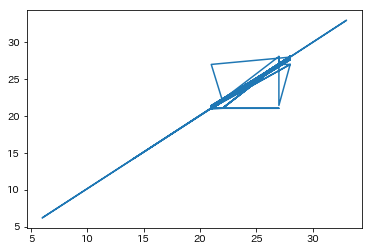

In [19]:
# plt.scatter(X, Y)
plt.plot(Y, pred)